# Classes Desbalanceadas

In [ ]:
# Instalando biblioteca

# !pip install imblearn

In [1]:
# Carregando bibliotecas

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import NearMiss
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

import warnings
warnings.filterwarnings('ignore', category = DeprecationWarning)

In [2]:
# Carregando base de dados

dados = pd.read_csv('/content/drive/MyDrive/Meus Scripts/Data Science do Zero/Dados/bank-full.csv', sep = ';')

In [3]:
# Visualizando os dados

dados.head(3)

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no


**Pré-Processamento dos dados**

In [4]:
# Formatando algumas colunas

dados['default'] = dados['default'].map({'no':0, 'yes':1})
dados['housing'] = dados['housing'].map({'no':0, 'yes':1})
dados['loan'] = dados['loan'].map({'no':0, 'yes':1})
dados['y'] = dados['y'].map({'no':0, 'yes':1})
dados.education = dados.education.map({'primary':0, 'secundary':1, 'tertiary':2})
dados.poutcome = dados.poutcome.map({'unknown':0, 'failure':1, 'other':2, 'success':3})
dados.contact = dados.contact.map({'cellular':0, 'unknown':1, 'telephone':2})
dados.month = pd.to_datetime(dados.month, format = '%b').dt.month

In [5]:
# Buscando valores missing

dados.isnull().sum()

age              0
job              0
marital          0
education    25059
default          0
balance          0
housing          0
loan             0
contact          0
day              0
month            0
duration         0
campaign         0
pdays            0
previous         0
poutcome         0
y                0
dtype: int64

In [6]:
# Removendo os valores missings

dados.dropna(inplace = True)

In [7]:
# Verificando se ainda existe valores missing

dados.isnull().sum()

age          0
job          0
marital      0
education    0
default      0
balance      0
housing      0
loan         0
contact      0
day          0
month        0
duration     0
campaign     0
pdays        0
previous     0
poutcome     0
y            0
dtype: int64

In [8]:
# Transformando colunas categóricas em numéricas

dados = pd.get_dummies(dados)

In [9]:
dados.head()

,age,education,default,balance,housing,loan,contact,day,month,duration,...,job_retired,job_self-employed,job_services,job_student,job_technician,job_unemployed,job_unknown,marital_divorced,marital_married,marital_single
0,58,2.0,0,2143,1,0,1,5,5,261,...,0,0,0,0,0,0,0,0,1,0
5,35,2.0,0,231,1,0,1,5,5,139,...,0,0,0,0,0,0,0,0,1,0
6,28,2.0,0,447,1,1,1,5,5,217,...,0,0,0,0,0,0,0,0,0,1
7,42,2.0,1,2,1,0,1,5,5,380,...,0,0,0,0,0,0,0,1,0,0
8,58,0.0,0,121,1,0,1,5,5,50,...,1,0,0,0,0,0,0,0,1,0


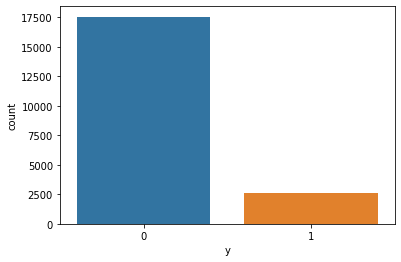

In [10]:
# Visualizando distribuição das classes

ax = sns.countplot(x = 'y', data = dados)

**Instânciando e treinando o modelo, separando os dados em previsores, classe, treino e teste**

In [11]:
# Separando os dados em previsores e classes

previsores = dados.drop('y', axis = 1)
classes = dados['y']

In [12]:
# Separando os dados em treino e teste

X_treino, X_teste, y_treino, y_teste = train_test_split(previsores, classes, random_state = 1, stratify = classes)

In [13]:
# Instânciando o modelo

modelo = LogisticRegression()

In [14]:
# Treinando o modelo

modelo.fit(X_treino, y_treino)

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,


LogisticRegression()

In [15]:
# Aplicando o modelo nos dados de teste e atribuindo a y_pred

y_pred = modelo.predict(X_teste)

**Métricas de validação**

In [16]:
# Acurácia

accuracy_score(y_teste, y_pred)

0.8809051210797936

In [17]:
# Matriz de Confusão

print(pd.crosstab(y_teste, y_pred, rownames = ['Real'], colnames = ['Predito'],
                  margins = True))

Predito     0    1   All
Real                    
0        4259  132  4391
1         468  179   647
All      4727  311  5038


In [18]:
# Relatório de classificação

print(classification_report(y_teste, y_pred))

              precision    recall  f1-score   support

           0       0.90      0.97      0.93      4391
           1       0.58      0.28      0.37       647

    accuracy                           0.88      5038
   macro avg       0.74      0.62      0.65      5038
weighted avg       0.86      0.88      0.86      5038



### Aplicando NearMiss

* **Iguala as quantidades de amostras entre as classe**

In [19]:
# Carregando biblioteca

from imblearn.under_sampling import NearMiss

In [20]:
# Instânciando o modelo

modelo_near = NearMiss()

In [21]:
# Aplicando o modelo nos dados previsores e nas classes

previsores, classes = modelo_near.fit_resample(previsores, classes)

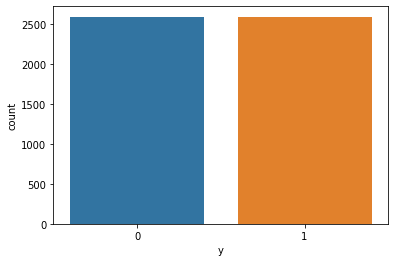

In [22]:
# Verificando a distribuição dos dados

ax = sns.countplot(x = classes)

In [23]:
# Separando os dados em treino e teste

X_train, X_test, y_train, y_test = train_test_split(
    previsores,
    classes,
    random_state = 1,
    stratify = classes
)

In [24]:
# Instânciando o modelo de Regressão Logística novamente

modelo_2 = LogisticRegression()

In [25]:
# Treinando o modelo

modelo_2.fit(X_train, y_train)

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,


LogisticRegression()

In [26]:
# Aplicando o modelo e atribuindo a y_pred2

y_pred2 = modelo_2.predict(X_test)

**Métricas de Validação**

In [27]:
# Acurácia

accuracy_score(y_test, y_pred2)

0.8941267387944358

In [28]:
# Matriz de Confusão

print(pd.crosstab(y_test, y_pred2, rownames = ['Real'], colnames = ['Predito'],
                  margins = True))

Predito    0    1   All
Real                   
0        586   61   647
1         76  571   647
All      662  632  1294


In [29]:
# Métricas

print(classification_report(y_test, y_pred2))

              precision    recall  f1-score   support

           0       0.89      0.91      0.90       647
           1       0.90      0.88      0.89       647

    accuracy                           0.89      1294
   macro avg       0.89      0.89      0.89      1294
weighted avg       0.89      0.89      0.89      1294



## Aplicando o SMOTE

* **Synthetic Minority Over-sampling Technique:** gera dados sintéticos da classe minoritária.

In [30]:
# Separando os dados em treino e teste

x_previsores = dados.drop('y', axis = 1)
y_classes = dados['y']

In [31]:
# Visualizando a quantidade de dados por classe

np.bincount(y_classes)

array([17565,  2587])

In [32]:
# Instânciando o modelo SMOTE

modelo_smt = SMOTE(sampling_strategy = 0.5)

In [33]:
# Aplicando o SMOTE nos dados

x_previsores, y_classes = modelo_smt.fit_resample(x_previsores, y_classes)

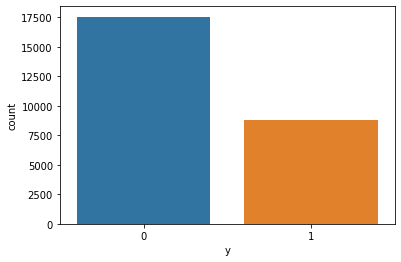

In [34]:
# Visualizando a distribuição dos dados: os dados da classe 1 foram aumentados

ax = sns.countplot(x = y_classes)

**Aplicando aos dados**

In [35]:
# Separando os dados em treino e teste

x_treino, x_teste, Y_treino, Y_teste = train_test_split(
    x_previsores,
    y_classes,
    random_state = 1,
    stratify = y_classes
)

In [36]:
# Instânciando o modelo

modelo_3 = LogisticRegression()

In [37]:
# Treinando o modelo

modelo_3.fit(x_treino, Y_treino)

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,


LogisticRegression()

In [38]:
# Aplicando o modelo e atribuindo a y_pred3

y_pred3 = modelo_3.predict(x_teste)

**Resultados**

In [39]:
# Acurácia

accuracy_score(Y_teste, y_pred3)

0.8214665249734325

In [40]:
# Matriz de Confusão

print(pd.crosstab(Y_teste, y_pred3, rownames = ['Real'], colnames = ['Predito'],
                  margins = True))

Predito     0     1   All
Real                     
0        3951   440  4391
1         736  1460  2196
All      4687  1900  6587


In [41]:
# Métricas

print(classification_report(Y_teste, y_pred3))

              precision    recall  f1-score   support

           0       0.84      0.90      0.87      4391
           1       0.77      0.66      0.71      2196

    accuracy                           0.82      6587
   macro avg       0.81      0.78      0.79      6587
weighted avg       0.82      0.82      0.82      6587

